In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Rutas de archivos
results_path = os.path.abspath(os.path.join("..", "results_vm"))
csv_path = os.path.join(results_path, "vm_scenarios_results.csv")

# Cargar datos
df_vm = pd.read_csv(csv_path)
df_vm['timestamp'] = pd.to_datetime(df_vm['timestamp'], format="%Y%m%d_%H%M%S")

# Mostrar últimos resultados
display(df_vm.tail())

,timestamp,test_type,cpu_percent,memory_percent,execution_time_sec,source
85,2025-05-17 15:25:55,memory_large,0.10,20.00,1.299544,VM
86,2025-05-17 15:25:59,disk_write,0.15,20.30,1.976494,VM
87,2025-05-17 15:26:01,disk_read,0.25,20.35,0.048967,VM
88,2025-05-17 15:26:03,network_download,0.35,20.35,0.104297,VM
89,2025-05-17 15:26:10,process_spawn,0.20,20.25,5.069285,VM


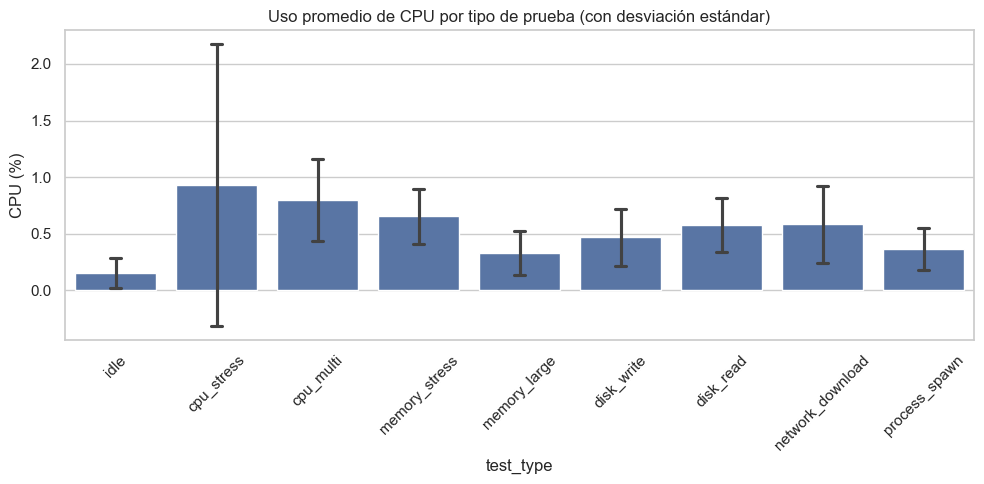

In [2]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="cpu_percent", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de CPU por tipo de prueba (con desviación estándar)")
plt.ylabel("CPU (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

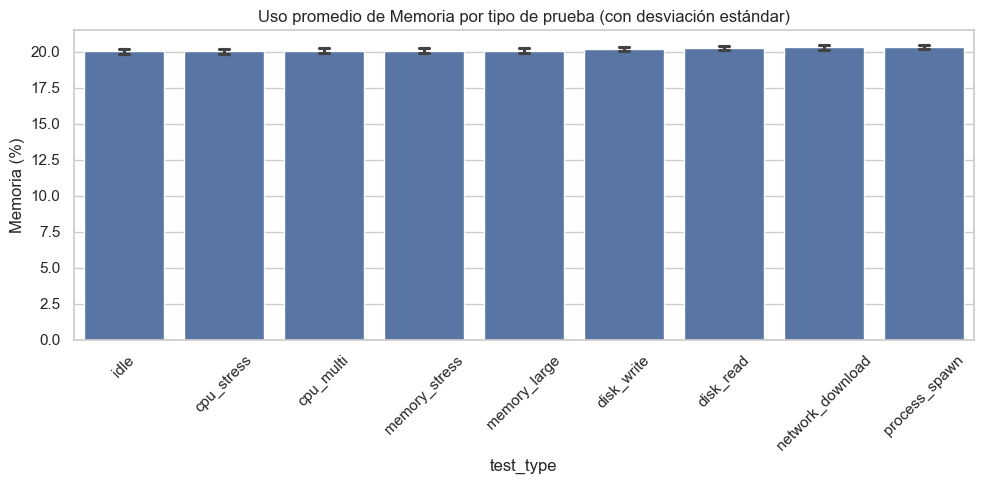

In [3]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="memory_percent", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de Memoria por tipo de prueba (con desviación estándar)")
plt.ylabel("Memoria (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

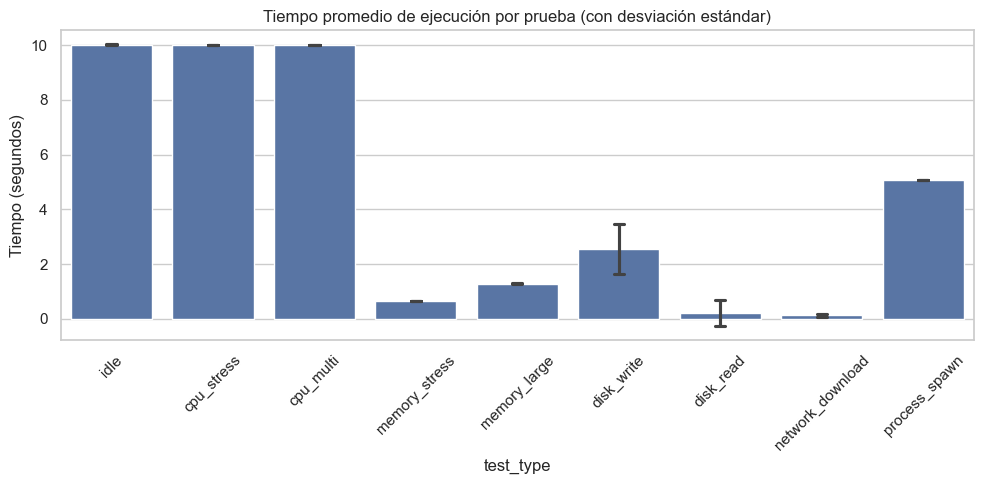

In [4]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="execution_time_sec", errorbar='sd', capsize=0.1)
plt.title("Tiempo promedio de ejecución por prueba (con desviación estándar)")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
grouped = df_vm.groupby("test_type").agg({
    "cpu_percent": ['mean', 'std'],
    "memory_percent": ['mean', 'std'],
    "execution_time_sec": ['mean', 'std']
}).round(2)

# Renombrar columnas para legibilidad
grouped.columns = ['CPU_mean', 'CPU_std', 'Mem_mean', 'Mem_std', 'Time_mean', 'Time_std']
display(grouped.sort_values("CPU_mean", ascending=False))

,CPU_mean,CPU_std,Mem_mean,Mem_std,Time_mean,Time_std
test_type,,,,,,
cpu_stress,0.93,1.24,20.05,0.18,10.01,0.00
cpu_multi,0.80,0.37,20.06,0.17,10.01,0.00
memory_stress,0.66,0.24,20.08,0.19,0.65,0.01
network_download,0.58,0.34,20.29,0.15,0.13,0.05
disk_read,0.57,0.24,20.26,0.16,0.21,0.46
disk_write,0.47,0.25,20.19,0.17,2.56,0.91
process_spawn,0.36,0.19,20.32,0.14,5.07,0.01
memory_large,0.33,0.19,20.08,0.19,1.29,0.01
idle,0.16,0.13,20.02,0.20,10.01,0.02
